<a href="https://colab.research.google.com/github/lakshmigojanece/-App-User-Behavior-Segmentation-Using-Unsupervised-Machine-Learning/blob/main/app_user_behavior_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [3]:
import pandas as pd


df = pd.read_csv("/content/sample_data/app_user_behavior_dataset (1).csv")



In [4]:
df.columns

Index(['user_id', 'age', 'gender', 'country', 'device_type', 'app_version',
       'sessions_per_week', 'avg_session_duration_min', 'daily_active_minutes',
       'feature_clicks_per_session', 'notifications_opened_per_week',
       'in_app_search_count', 'pages_viewed_per_session',
       'crash_events_last_30_days', 'support_tickets_raised',
       'days_since_last_login', 'subscription_type',
       'ads_clicked_last_30_days', 'content_downloads', 'social_shares',
       'rating_given', 'churn_risk_score', 'engagement_score',
       'account_age_days', 'marketing_source'],
      dtype='object')

In [5]:
df.shape

(50000, 25)

In [6]:
df.isnull().sum()

,0
user_id,0
age,0
gender,0
country,0
device_type,0
app_version,0
sessions_per_week,0
avg_session_duration_min,0
daily_active_minutes,0
feature_clicks_per_session,0


In [7]:
df['rating_given'].value_counts()


,count
rating_given,
4.0,17465
3.0,11199
5.0,9911
2.0,3885
1.0,2518


In [8]:
df.rating_given.unique()

array([nan,  3.,  2.,  5.,  4.,  1.])

In [9]:
df.rating_given.mean(),df.rating_given.median()

(np.float64(3.6306638801191693), 4.0)

In [10]:
df.rating_given.fillna(df.rating_given.median(),inplace=True)

/tmp/ipython-input-3458127267.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.rating_given.fillna(df.rating_given.median(),inplace=True)


In [11]:
df.isnull().sum()

,0
user_id,0
age,0
gender,0
country,0
device_type,0
app_version,0
sessions_per_week,0
avg_session_duration_min,0
daily_active_minutes,0
feature_clicks_per_session,0


In [19]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.head()

,user_id,age,gender,country,device_type,app_version,sessions_per_week,avg_session_duration_min,daily_active_minutes,feature_clicks_per_session,...,days_since_last_login,subscription_type,ads_clicked_last_30_days,content_downloads,social_shares,rating_given,churn_risk_score,engagement_score,account_age_days,marketing_source
0,100000,56,Female,India,iOS,2.1,5,3.41,52.71,13,...,20,Basic,9,5,2,4.0,0.31,55.79,1152,Referral
1,100001,46,Male,UK,iOS,1.0,8,24.44,42.03,7,...,7,Free,8,3,3,3.0,0.87,82.39,1059,Email Campaign
2,100002,32,Female,UK,iOS,1.2,12,5.34,76.69,7,...,33,Free,11,6,1,2.0,0.63,42.49,678,Google Ads
3,100003,25,Male,India,Android,2.0,5,3.98,65.38,16,...,17,Basic,6,3,1,3.0,0.43,62.81,92,Organic
4,100004,38,Male,Australia,Android,1.0,10,12.85,57.06,13,...,21,Basic,4,4,2,5.0,0.43,38.21,772,Email Campaign


In [13]:
df.user_id.nunique()##Helps in customer-level analysis and targeting


50000

In [16]:
df['user_id'].value_counts()

,count
user_id,
149983,1
149982,1
149981,1
149980,1
149979,1
...,...
100004,1
100003,1
100002,1


In [17]:
df['age'].value_counts()##Supporting segmentation insights


,count
age,
34,1280
40,1272
30,1260
43,1248
45,1236
46,1233
53,1221
55,1221
21,1216


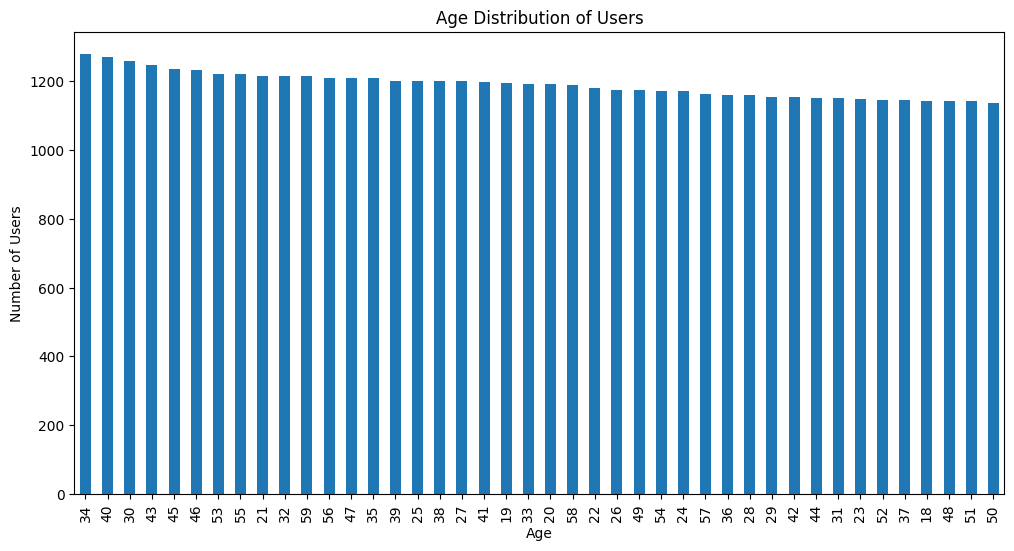

In [22]:

df['age'].value_counts().plot(kind='bar', figsize=(12,6))
plt.xlabel("Age")
plt.ylabel("Number of Users")
plt.title("Age Distribution of Users")
plt.show()


In [ ]:
df['gender'].value_counts()##Identifying usage patterns across gender groups,

,count
gender,
Female,23994
Male,23936
Other,2070


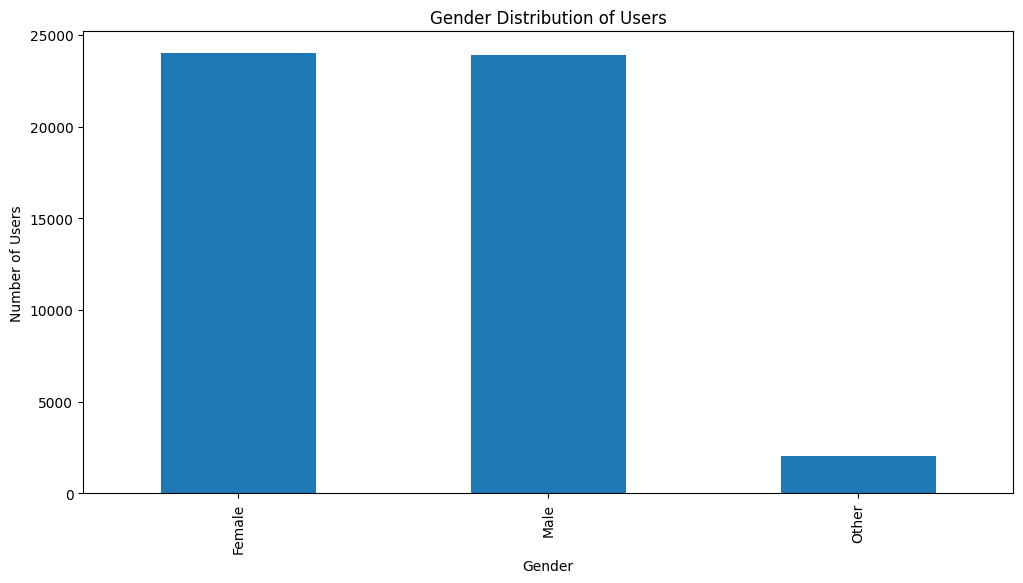

In [21]:
df['gender'].value_counts().plot(kind='bar', figsize=(12,6))
plt.xlabel("Gender")
plt.ylabel("Number of Users")
plt.title("Gender Distribution of Users")
plt.show()

In [23]:
df['country'].value_counts()##Identifying high-engagement regions,Supporting localization strategies



,count
country,
India,22550
USA,9115
UK,5043
Canada,3853
Australia,3498
Germany,3425
Singapore,2516


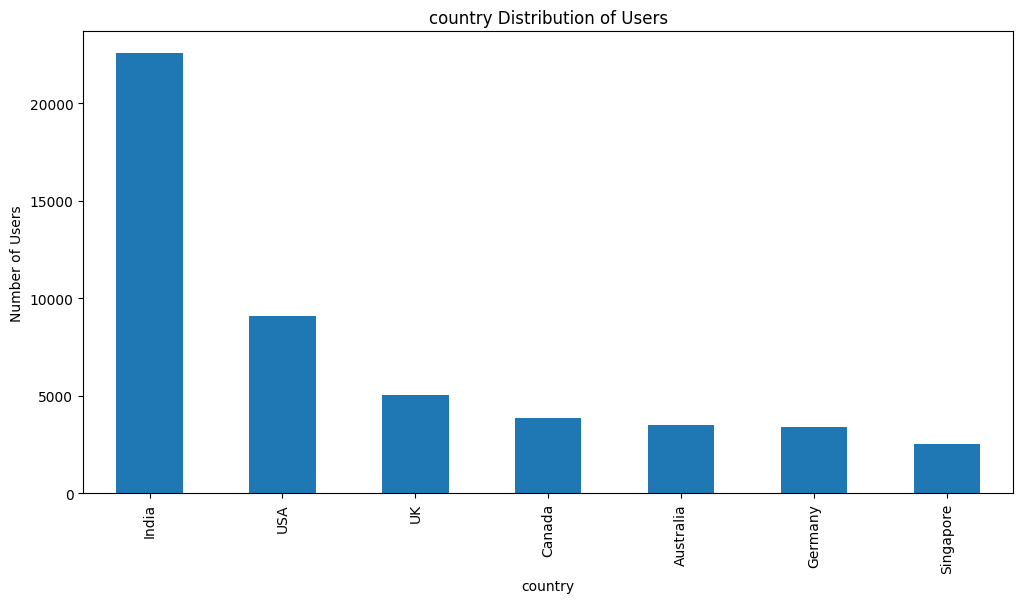

In [24]:
df['country'].value_counts().plot(kind='bar',figsize=(12,6))
plt.xlabel("country")
plt.ylabel("Number of Users")
plt.title("country Distribution of Users")
plt.show()

In [25]:
df['device_type'].value_counts()#Optimizing app performance by device


,count
device_type,
Android,27315
iOS,17662
Web,5023


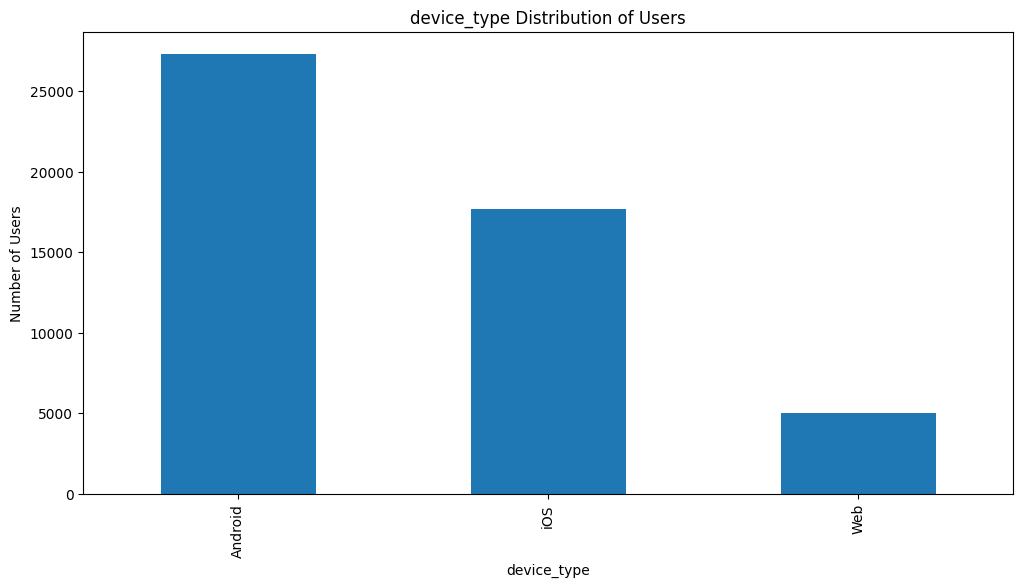

In [26]:
df['device_type'].value_counts().plot(kind='bar',figsize=(12,6))
plt.xlabel("device_type")
plt.ylabel("Number of Users")
plt.title("device_type Distribution of Users")
plt.show()

In [27]:
df['app_version'].value_counts()##Detecting performance or engagement issues by version

,count
app_version,
1.0,10158
1.2,10054
1.1,9979
2.0,9923
2.1,9886


In [28]:
df['sessions_per_week'].value_counts()##Strong contributor to user clustering


,count
sessions_per_week,
7,7137
8,6874
9,6166
6,6157
10,4926
5,4576
11,3657
4,2842
12,2373


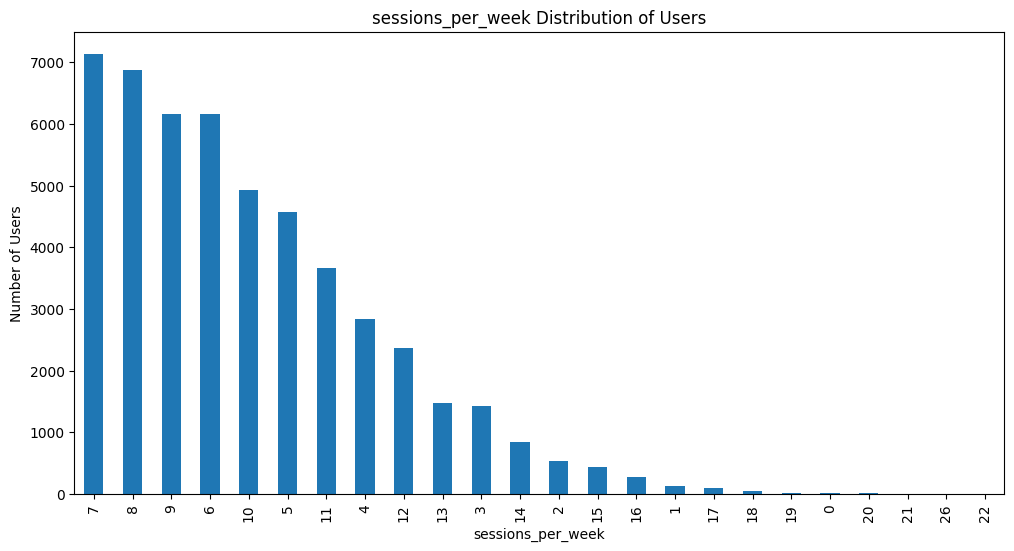

In [29]:
df['sessions_per_week'].value_counts().plot(kind='bar',figsize=(12,6))
plt.xlabel("sessions_per_week")
plt.ylabel("Number of Users")
plt.title("sessions_per_week Distribution of Users")
plt.show()

In [33]:
df['avg_session_duration_min'].value_counts()

,count
avg_session_duration_min,
6.37,43
5.76,43
10.51,41
7.37,41
4.79,41
...,...
43.19,1
47.05,1
60.20,1


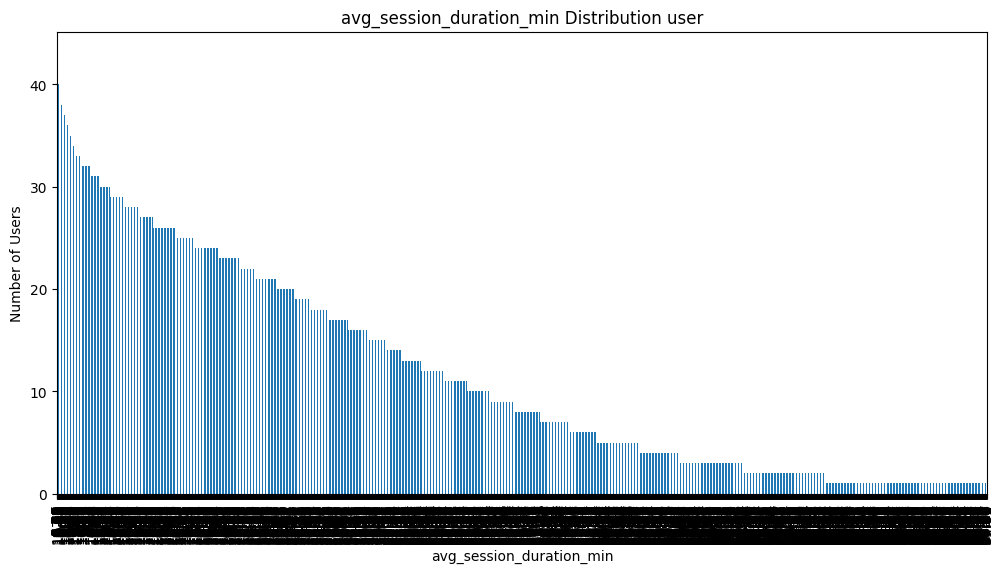

In [32]:
df['avg_session_duration_min'].value_counts().plot(kind='bar',figsize=(12,6))
plt.xlabel("avg_session_duration_min")
plt.ylabel("Number of Users")
plt.title("avg_session_duration_min Distribution user")
plt.show()

In [34]:
df['daily_active_minutes'].value_counts() ### Supports churn risk identification


,count
daily_active_minutes,
5.00,1154
43.25,22
45.93,21
47.35,20
54.57,19
...,...
11.26,1
88.15,1
78.91,1


In [35]:
df['feature_clicks_per_session'].value_counts()#Helps identify power users


,count
feature_clicks_per_session,
11,5724
12,5592
13,5346
10,5155
14,4497
9,4341
15,3726
8,3341
16,2747


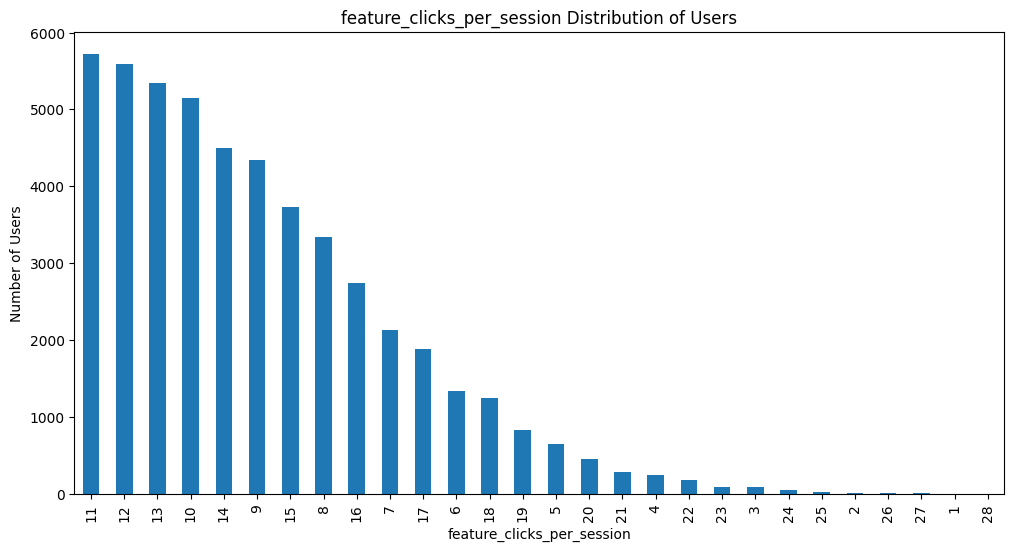

In [37]:
df['feature_clicks_per_session'].value_counts().plot(kind='bar',figsize=(12,6))
plt.xlabel("feature_clicks_per_session")
plt.ylabel("Number of Users")
plt.title("feature_clicks_per_session Distribution of Users")
plt.show()


In [38]:
df['notifications_opened_per_week'].value_counts()#Helps evaluate notification strategy effectiveness

,count
notifications_opened_per_week,
5,8800
4,8772
6,7182
3,7034
7,5324
2,4291
8,3209
9,1832
1,1633


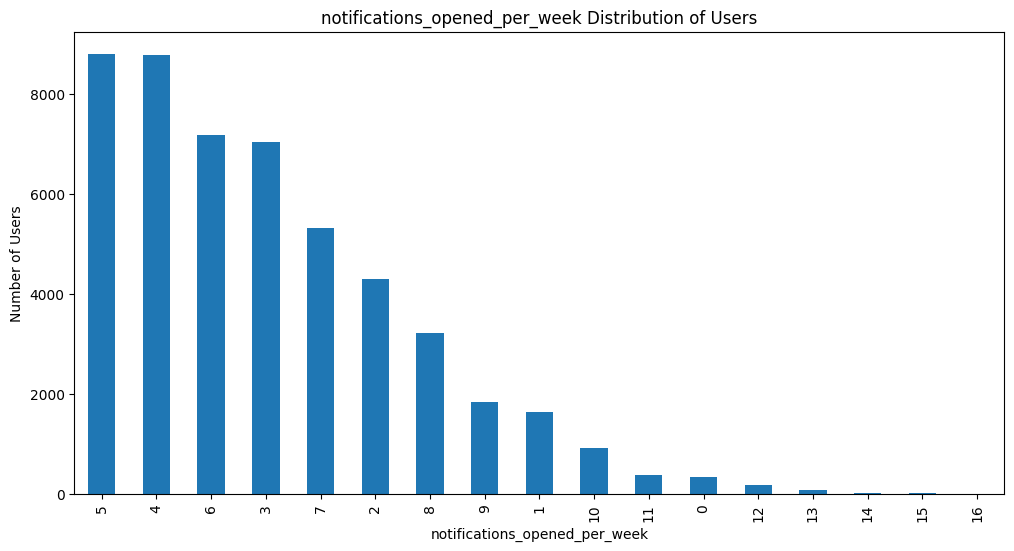

In [39]:
df['notifications_opened_per_week'].value_counts().plot(kind='bar',figsize=(12,6))
plt.xlabel("notifications_opened_per_week")
plt.ylabel("Number of Users")
plt.title("notifications_opened_per_week Distribution of Users")
plt.show()

In [40]:
df['in_app_search_count'].value_counts()#Helps understand content discovery patterns

,count
in_app_search_count,
4,9879
3,9845
5,7761
2,7228
6,5196
1,3662
7,3043
8,1418
0,914


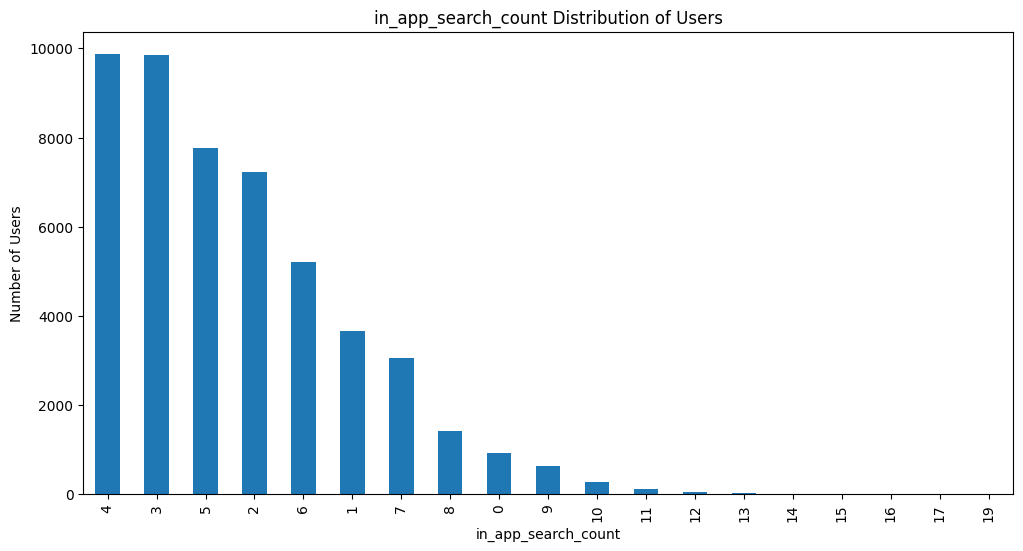

In [41]:
df['in_app_search_count'].value_counts().plot(kind='bar',figsize=(12,6))
plt.xlabel("in_app_search_count")
plt.ylabel("Number of Users")
plt.title("in_app_search_count Distribution of Users")
plt.show()

In [42]:
df['pages_viewed_per_session'].value_counts()#Identifies exploratory users


,count
pages_viewed_per_session,
11,2393
6,2373
17,2338
16,2320
22,2304
14,2298
3,2293
10,2293
4,2292


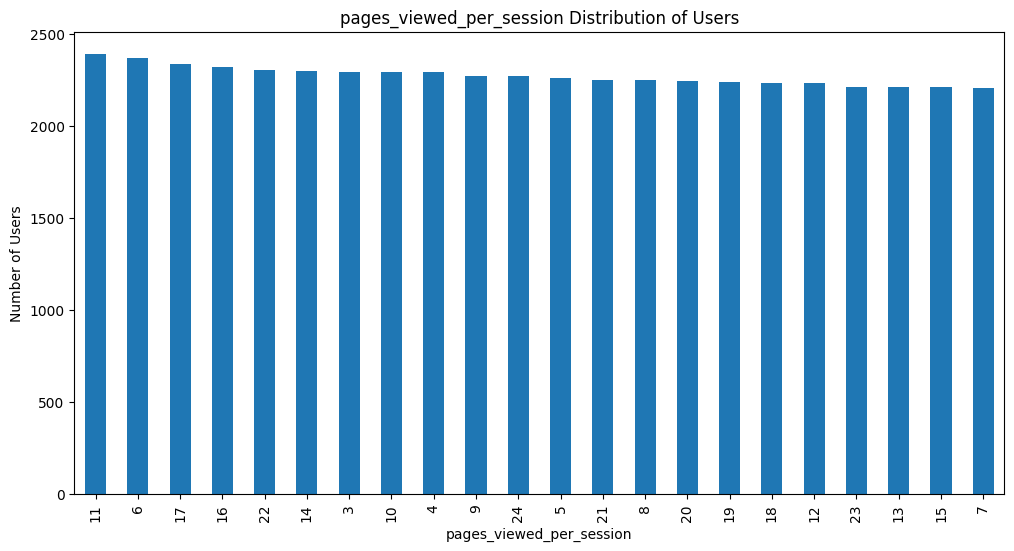

In [43]:
df['pages_viewed_per_session'].value_counts().plot(kind='bar',figsize=(12,6))
plt.xlabel("pages_viewed_per_session")
plt.ylabel("Number of Users")
plt.title("pages_viewed_per_session Distribution of Users")
plt.show()

In [47]:
df['crash_events_last_30_days'].value_counts()#Correlated with dissatisfaction and churn


,count
crash_events_last_30_days,
0,33699
1,13166
2,2737
3,360
4,34
5,4


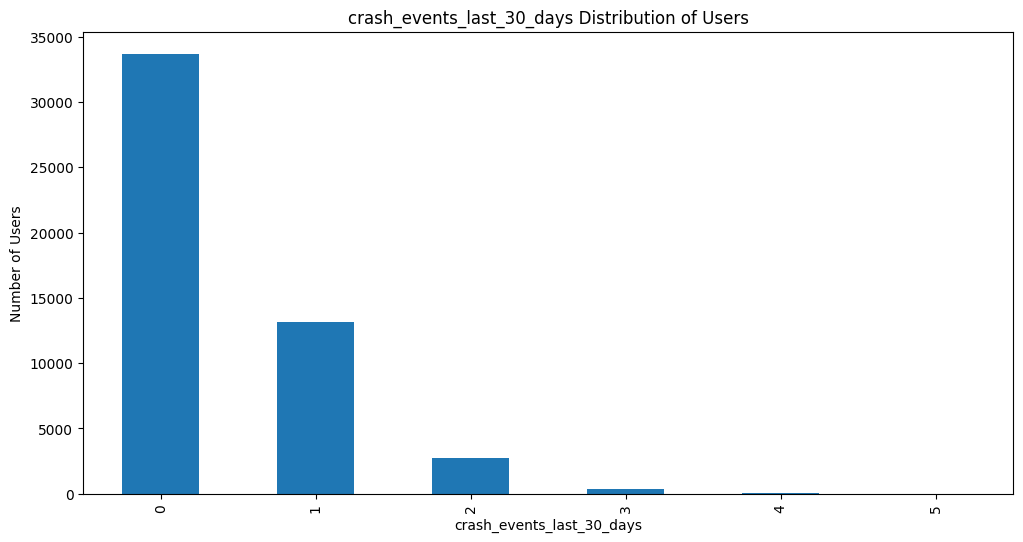

In [44]:
df['crash_events_last_30_days'].value_counts().plot(kind='bar',figsize=(12,6))
plt.xlabel("crash_events_last_30_days")
plt.ylabel("Number of Users")
plt.title("crash_events_last_30_days Distribution of Users")
plt.show()

In [48]:
df['support_tickets_raised'].value_counts()##Strong churn indicator,Helps identify inactive users


,count
support_tickets_raised,
0,41090
1,8046
2,811
3,47
4,6


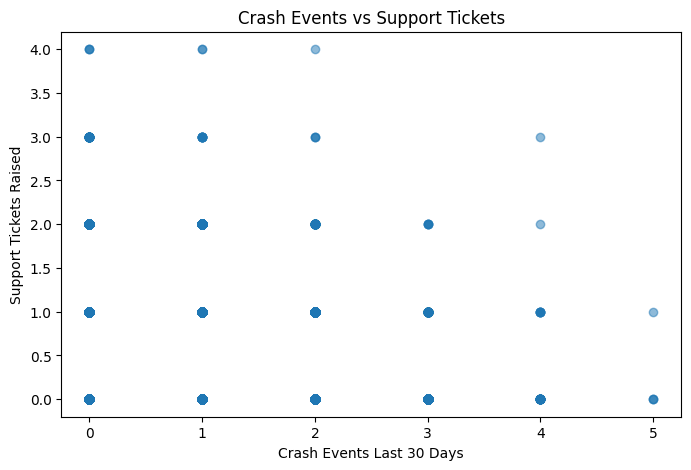

In [46]:
plt.figure(figsize=(8,5))
plt.scatter(df['crash_events_last_30_days'], df['support_tickets_raised'], alpha=0.5)
plt.xlabel("Crash Events Last 30 Days")
plt.ylabel("Support Tickets Raised")
plt.title("Crash Events vs Support Tickets")
plt.show()


In [ ]:
df['subscription_type'].value_counts()#Revenue and monetization analysis,Cluster profiling


,count
subscription_type,
Free,30088
Basic,12495
Premium,7417


In [131]:
df['days_since_last_login'].value_counts()

,count
days_since_last_login,
10,1183
43,1166
18,1151
2,1147
28,1146
31,1142
0,1137
23,1135
36,1132


In [49]:
df['ads_clicked_last_30_days'].value_counts()##ads_clicked_last_30_days

,count
ads_clicked_last_30_days,
5,8067
6,7867
7,6797
4,6784
8,5306
3,4539
9,3372
2,2206
10,2049


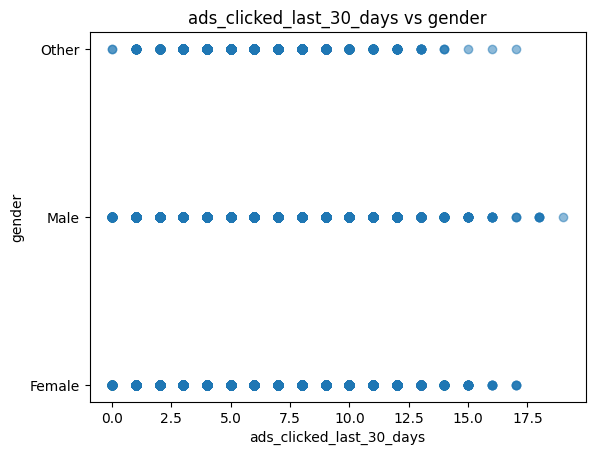

In [52]:
figsize=(12,6)
plt.scatter(df['ads_clicked_last_30_days'],df['gender'],alpha=0.5)
plt.xlabel("ads_clicked_last_30_days")
plt.ylabel("gender")
plt.title("ads_clicked_last_30_days vs gender")
plt.show()

<Axes: xlabel='subscription_type', ylabel='ads_clicked_last_30_days'>

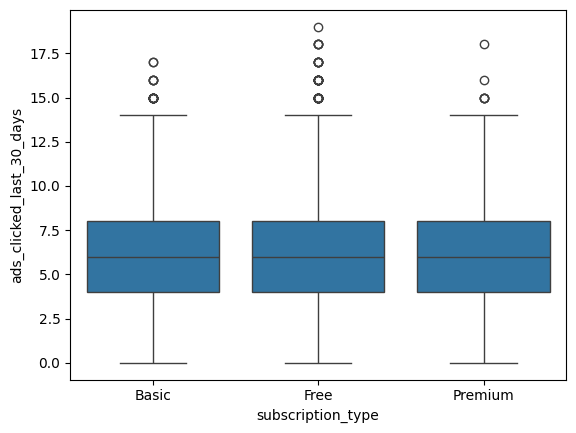

In [55]:
import seaborn as sns
sns.boxplot(x='subscription_type', y='ads_clicked_last_30_days', data=df)


In [ ]:
df['content_downloads'].value_counts()##Helps identify content-heavy users


,count
content_downloads,
2,11258
3,11240
4,8521
1,7369
5,4920
6,2498
0,2489
7,1083
8,421


<Axes: xlabel='subscription_type', ylabel='content_downloads'>

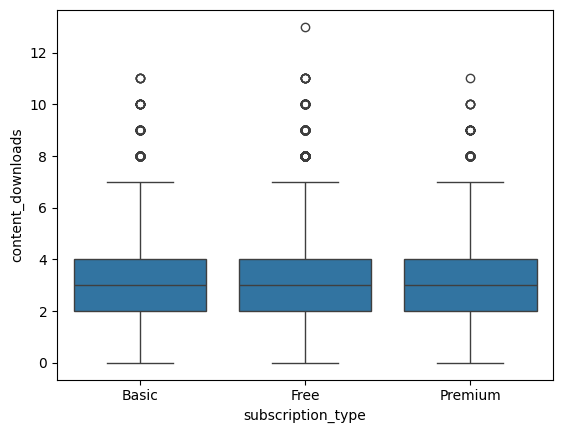

In [56]:
import seaborn as sns
sns.boxplot(x='subscription_type', y='content_downloads', data=df)


In [ ]:
df['social_shares'].value_counts()##Identifies influencer-type users

,count
social_shares,
2,13649
1,13418
3,8967
0,6790
4,4542
5,1784
6,631
7,178
8,36


<Axes: xlabel='content_downloads', ylabel='social_shares'>

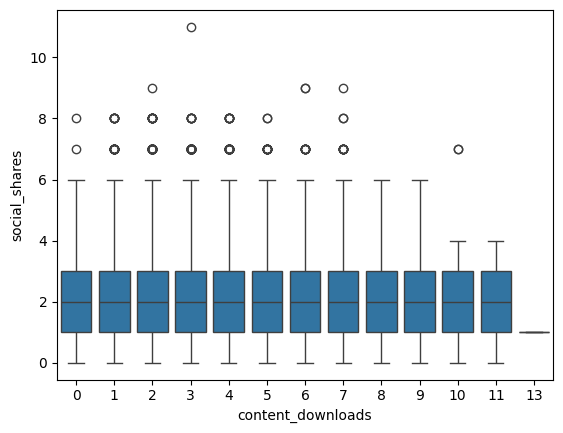

In [58]:
sns.boxplot(x='content_downloads', y='social_shares', data=df)


<Axes: xlabel='subscription_type', ylabel='social_shares'>

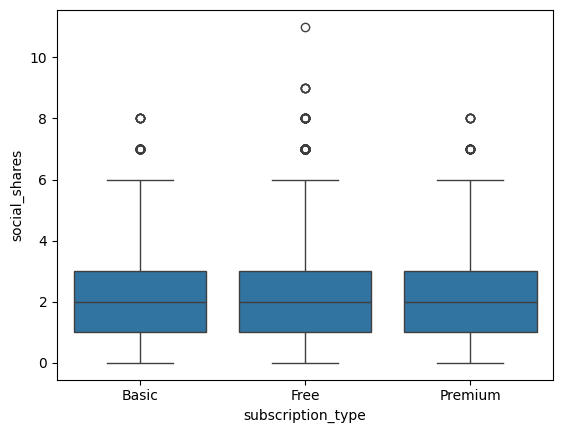

In [57]:
sns.boxplot(x='subscription_type', y='social_shares', data=df)


In [59]:
df['rating_given'].value_counts()#Supports quality and sentiment analysis


,count
rating_given,
4.0,22487
3.0,11199
5.0,9911
2.0,3885
1.0,2518


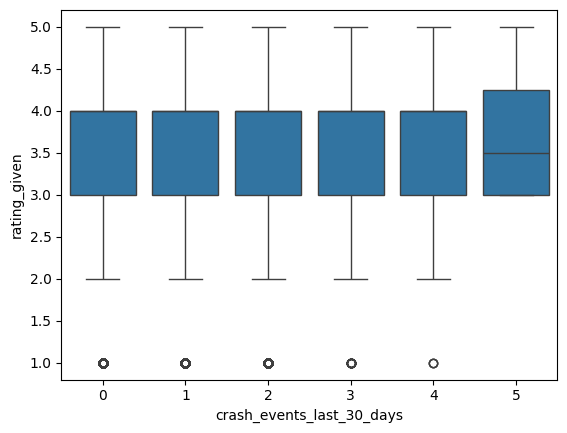

In [62]:
snsplot=sns.boxplot(x='crash_events_last_30_days', y='rating_given', data=df)

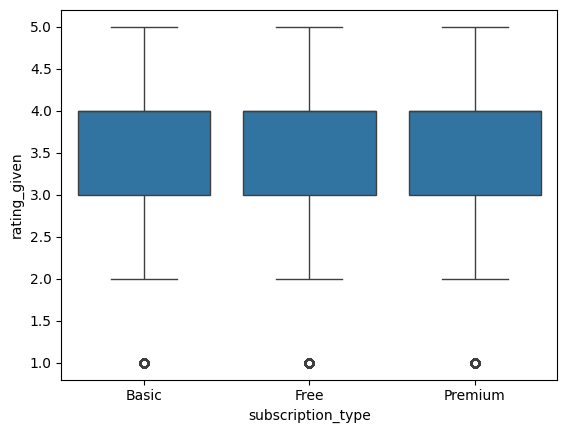

In [60]:
snsplot=sns.boxplot(x='subscription_type', y='rating_given', data=df)

In [63]:
df['churn_risk_score'].value_counts()##Risk identification,Prioritizing retention strategies


,count
churn_risk_score,
0.64,564
0.77,552
0.78,547
0.43,541
0.65,535
...,...
0.46,465
0.88,458
0.68,446


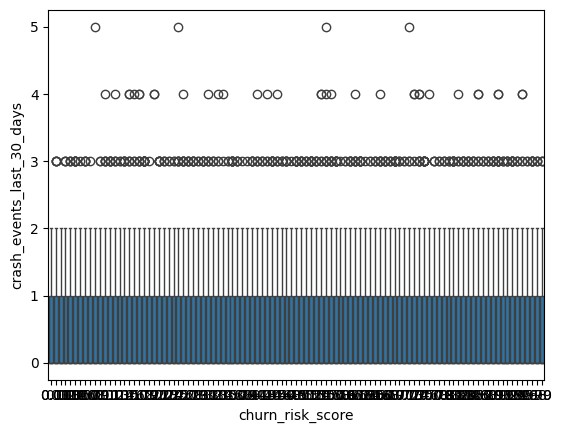

In [66]:
snsplot=sns.boxplot(x='churn_risk_score', y='crash_events_last_30_days', data=df)

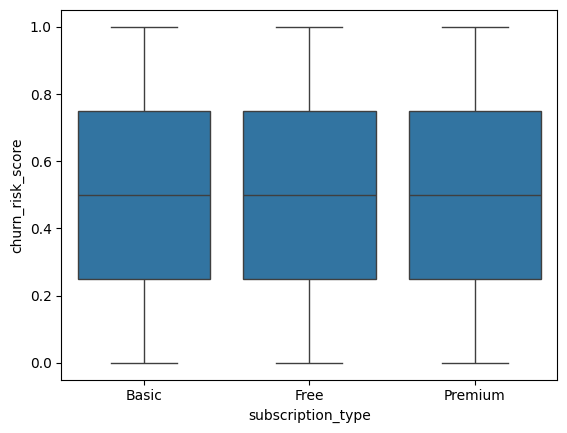

In [68]:
snsplot=sns.boxplot(y='churn_risk_score', x='subscription_type', data=df)

In [72]:
df['engagement_score'].value_counts()##Differentiates high and low value users


,count
engagement_score,
100.00,508
70.05,25
64.84,25
70.21,24
67.27,24
...,...
18.40,1
34.93,1
19.34,1


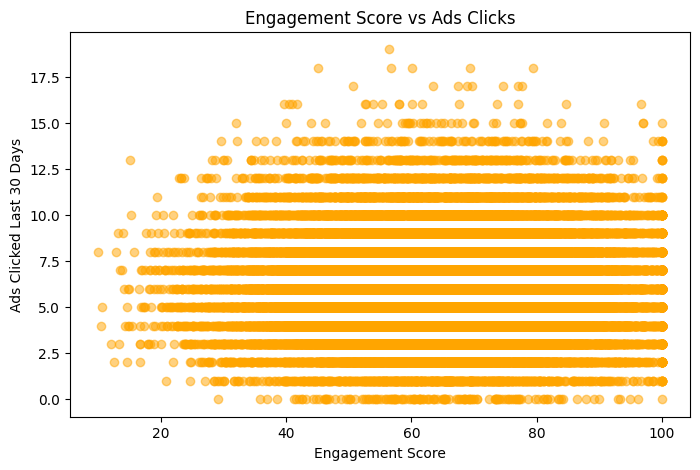

In [73]:
plt.figure(figsize=(8,5))
plt.scatter(df['engagement_score'], df['ads_clicked_last_30_days'], alpha=0.5, color='orange')
plt.xlabel("Engagement Score")
plt.ylabel("Ads Clicked Last 30 Days")
plt.title("Engagement Score vs Ads Clicks")
plt.show()


In [78]:
df.columns

Index(['user_id', 'age', 'gender', 'country', 'device_type', 'app_version',
       'sessions_per_week', 'avg_session_duration_min', 'daily_active_minutes',
       'feature_clicks_per_session', 'notifications_opened_per_week',
       'in_app_search_count', 'pages_viewed_per_session',
       'crash_events_last_30_days', 'support_tickets_raised',
       'days_since_last_login', 'subscription_type',
       'ads_clicked_last_30_days', 'content_downloads', 'social_shares',
       'rating_given', 'churn_risk_score', 'engagement_score',
       'account_age_days', 'marketing_source'],
      dtype='object')

In [74]:
df['account_age_days'].value_counts()##User lifecycle analysis,Understanding engagement over time


,count
account_age_days,
805,60
24,59
1021,59
384,59
781,59
...,...
428,26
203,26
874,25


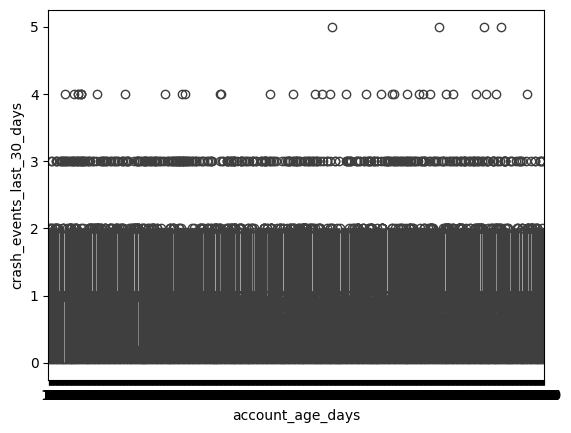

In [80]:
snsplot=sns.boxplot(x='account_age_days',y='crash_events_last_30_days',data=df)

In [76]:
df['marketing_source'].value_counts()##Marketing performance analysis,Acquisition quality comparison


,count
marketing_source,
Organic,17539
Google Ads,12468
Referral,7539
Facebook Ads,7463
Email Campaign,4991


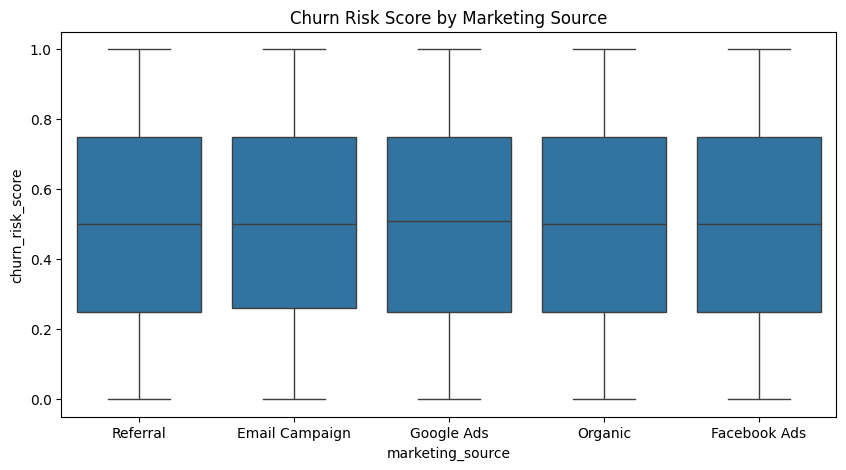

In [77]:

plt.figure(figsize=(10,5))
sns.boxplot(x='marketing_source', y='churn_risk_score', data=df)
plt.title("Churn Risk Score by Marketing Source")
plt.show()


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   user_id                        50000 non-null  int64  
 1   age                            50000 non-null  int64  
 2   gender                         50000 non-null  object 
 3   country                        50000 non-null  object 
 4   device_type                    50000 non-null  object 
 5   app_version                    50000 non-null  float64
 6   sessions_per_week              50000 non-null  int64  
 7   avg_session_duration_min       50000 non-null  float64
 8   daily_active_minutes           50000 non-null  float64
 9   feature_clicks_per_session     50000 non-null  int64  
 10  notifications_opened_per_week  50000 non-null  int64  
 11  in_app_search_count            50000 non-null  int64  
 12  pages_viewed_per_session       50000 non-null 

In [ ]:
### drop unique columns k means is cluculate grouping and is used to calculate disatnce unique is not ok

In [82]:
df = df.drop(columns=['user_id', 'app_version', 'country', 'marketing_source'])


In [84]:
df.head()

,age,gender,device_type,sessions_per_week,avg_session_duration_min,daily_active_minutes,feature_clicks_per_session,notifications_opened_per_week,in_app_search_count,pages_viewed_per_session,...,support_tickets_raised,days_since_last_login,subscription_type,ads_clicked_last_30_days,content_downloads,social_shares,rating_given,churn_risk_score,engagement_score,account_age_days
0,56,Female,iOS,5,3.41,52.71,13,5,8,8,...,0,20,Basic,9,5,2,4.0,0.31,55.79,1152
1,46,Male,iOS,8,24.44,42.03,7,7,3,7,...,0,7,Free,8,3,3,3.0,0.87,82.39,1059
2,32,Female,iOS,12,5.34,76.69,7,5,2,21,...,0,33,Free,11,6,1,2.0,0.63,42.49,678
3,25,Male,Android,5,3.98,65.38,16,8,4,13,...,0,17,Basic,6,3,1,3.0,0.43,62.81,92
4,38,Male,Android,10,12.85,57.06,13,7,3,15,...,0,21,Basic,4,4,2,5.0,0.43,38.21,772


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            50000 non-null  int64  
 1   gender                         50000 non-null  object 
 2   device_type                    50000 non-null  object 
 3   sessions_per_week              50000 non-null  int64  
 4   avg_session_duration_min       50000 non-null  float64
 5   daily_active_minutes           50000 non-null  float64
 6   feature_clicks_per_session     50000 non-null  int64  
 7   notifications_opened_per_week  50000 non-null  int64  
 8   in_app_search_count            50000 non-null  int64  
 9   pages_viewed_per_session       50000 non-null  int64  
 10  crash_events_last_30_days      50000 non-null  int64  
 11  support_tickets_raised         50000 non-null  int64  
 12  days_since_last_login          50000 non-null 

In [ ]:
#encoding----> one-hot encoding using and iam not use label encoding(But actually no order exists, So Label Encoding not best for K-Means)
 #(K-Means distance calculate pannum)
 #one hot encoding (work seperately)

In [91]:
df=pd.get_dummies(df, columns=['gender', 'device_type','subscription_type'], drop_first=True)


In [93]:
df.shape

(50000, 24)

In [94]:
df.columns

Index(['age', 'sessions_per_week', 'avg_session_duration_min',
       'daily_active_minutes', 'feature_clicks_per_session',
       'notifications_opened_per_week', 'in_app_search_count',
       'pages_viewed_per_session', 'crash_events_last_30_days',
       'support_tickets_raised', 'days_since_last_login',
       'ads_clicked_last_30_days', 'content_downloads', 'social_shares',
       'rating_given', 'churn_risk_score', 'engagement_score',
       'account_age_days', 'gender_Male', 'gender_Other', 'device_type_Web',
       'device_type_iOS', 'subscription_type_Free',
       'subscription_type_Premium'],
      dtype='object')

In [ ]:
### most important scaling----> standardscaler, minmaxscaler

In [101]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)


In [102]:
X_scaled

array([[ 1.44582147e+00, -1.06017869e+00, -1.08863311e+00, ...,
         1.35312101e+00, -1.22924717e+00, -4.17345766e-01],
       [ 6.19021691e-01,  1.13097791e-04,  1.26191368e+00, ...,
         1.35312101e+00,  8.13506040e-01, -4.17345766e-01],
       [-5.38498006e-01,  1.41383549e+00, -8.72914839e-01, ...,
         1.35312101e+00,  8.13506040e-01, -4.17345766e-01],
       ...,
       [ 3.70981756e-01, -7.06748096e-01,  9.52307658e-01, ...,
         1.35312101e+00,  8.13506040e-01, -4.17345766e-01],
       [ 2.05621799e-01,  1.76726608e+00,  1.27436744e-01, ...,
         1.35312101e+00,  8.13506040e-01, -4.17345766e-01],
       [-1.03457788e+00,  3.53543695e-01,  8.29359419e-01, ...,
        -7.39032201e-01,  8.13506040e-01, -4.17345766e-01]])

In [113]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
y_scaled = scaler.fit_transform(df)


In [114]:
y_scaled

array([[0.92682927, 0.19230769, 0.03667616, ..., 0.        , 0.        ,
        0.        ],
       [0.68292683, 0.30769231, 0.26691482, ..., 1.        , 0.        ,
        0.        ],
       [0.34146341, 0.46153846, 0.057806  , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.6097561 , 0.23076923, 0.23658857, ..., 1.        , 0.        ,
        0.        ],
       [0.56097561, 0.5       , 0.15579155, ..., 1.        , 0.        ,
        0.        ],
       [0.19512195, 0.34615385, 0.22454565, ..., 1.        , 0.        ,
        1.        ]])

In [115]:
inertia = []
for k in range(1, 11):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(y_scaled)
  inertia.append(km.inertia_)


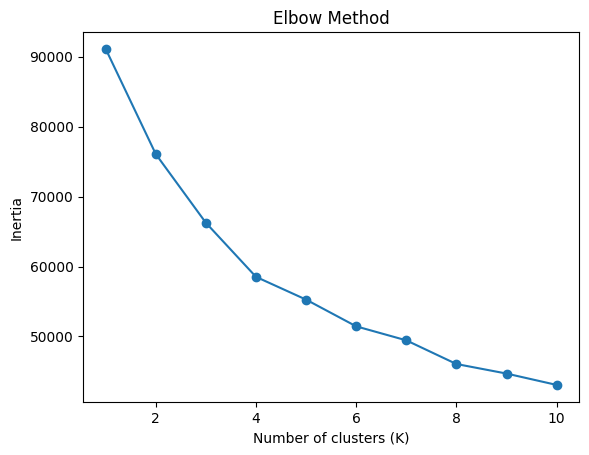

In [116]:
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [ ]:
##k=4 both scaling same k value

In [ ]:
###elbow

In [105]:
inertia = []
for k in range(1, 11):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(X_scaled)
  inertia.append(km.inertia_)


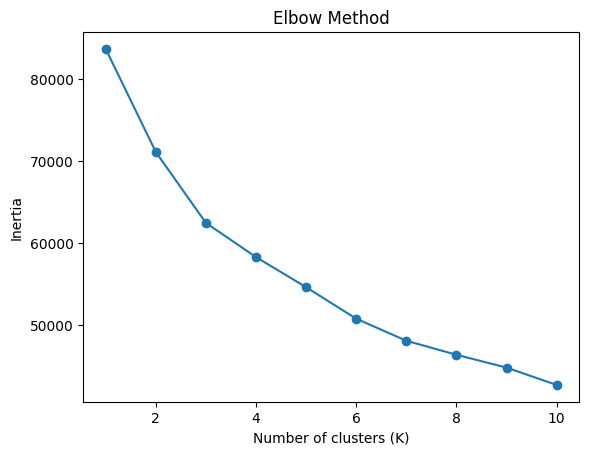

In [108]:
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()


In [ ]:
#Best K = 4

In [109]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


In [110]:
df['cluster']

,cluster
0,0
1,0
2,0
3,2
4,2
...,...
49995,1
49996,0
49997,0
49998,0


In [117]:
df

,age,sessions_per_week,avg_session_duration_min,daily_active_minutes,feature_clicks_per_session,notifications_opened_per_week,in_app_search_count,pages_viewed_per_session,crash_events_last_30_days,support_tickets_raised,...,churn_risk_score,engagement_score,account_age_days,gender_Male,gender_Other,device_type_Web,device_type_iOS,subscription_type_Free,subscription_type_Premium,cluster
0,56,5,3.41,52.71,13,5,8,8,1,0,...,0.31,55.79,1152,False,False,False,True,False,False,0
1,46,8,24.44,42.03,7,7,3,7,0,0,...,0.87,82.39,1059,True,False,False,True,True,False,0
2,32,12,5.34,76.69,7,5,2,21,1,0,...,0.63,42.49,678,False,False,False,True,True,False,0
3,25,5,3.98,65.38,16,8,4,13,0,0,...,0.43,62.81,92,True,False,False,False,False,False,2
4,38,10,12.85,57.06,13,7,3,15,0,0,...,0.43,38.21,772,True,False,False,False,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,23,10,8.68,70.21,15,4,4,22,0,1,...,0.39,68.97,121,True,False,False,False,True,False,1
49996,34,6,3.30,41.51,9,4,3,17,0,1,...,0.12,64.84,133,False,False,False,True,False,False,0
49997,43,6,21.67,58.00,9,6,3,14,0,0,...,0.60,69.70,1120,True,False,False,True,True,False,0
49998,41,13,14.29,37.93,10,4,5,12,0,0,...,0.22,71.00,1175,True,False,False,True,True,False,0


In [112]:
df['cluster'].value_counts()

,count
cluster,
3,14402
2,13368
0,12938
1,9292


Cluster	Meaning
Cluster 0	High engagement / Loyal (Power users)
Cluster 1	Moderate engagement (Average users)
Cluster 2	Low engagement / At-risk (Leaving-soon users)
Cluster 3	Occasional users/ interested but not regular uses

In [119]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a dataframe for PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Cluster']=df['cluster']

In [120]:
pca_df['Cluster']

,Cluster
0,0
1,0
2,0
3,2
4,2
...,...
49995,1
49996,0
49997,0
49998,0


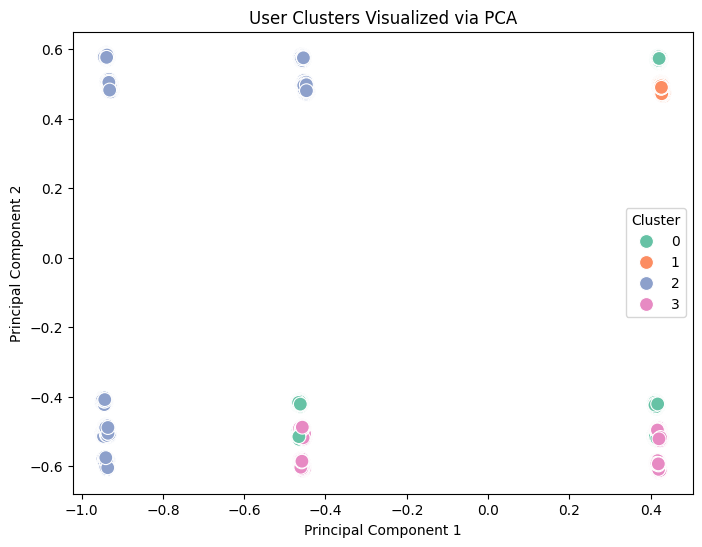

In [121]:
# Step 7: Visualize clusters
plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='Set2', s=100)
plt.title('User Clusters Visualized via PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [123]:
df.columns

Index(['age', 'sessions_per_week', 'avg_session_duration_min',
       'daily_active_minutes', 'feature_clicks_per_session',
       'notifications_opened_per_week', 'in_app_search_count',
       'pages_viewed_per_session', 'crash_events_last_30_days',
       'support_tickets_raised', 'days_since_last_login',
       'ads_clicked_last_30_days', 'content_downloads', 'social_shares',
       'rating_given', 'churn_risk_score', 'engagement_score',
       'account_age_days', 'gender_Male', 'gender_Other', 'device_type_Web',
       'device_type_iOS', 'subscription_type_Free',
       'subscription_type_Premium', 'cluster'],
      dtype='object')

In [124]:
cluster2_users = df[df['cluster'] == 2]
print("Cluster 2 Users (At-risk):")
print(cluster2_users[['age', 'sessions_per_week', 'avg_session_duration_min',
       'daily_active_minutes', 'feature_clicks_per_session',
       'notifications_opened_per_week', 'in_app_search_count',
       'pages_viewed_per_session', 'crash_events_last_30_days',
       'support_tickets_raised', 'days_since_last_login',
       'ads_clicked_last_30_days', 'content_downloads', 'social_shares',
       'rating_given', 'churn_risk_score', 'engagement_score',
       'account_age_days', 'gender_Male', 'gender_Other', 'device_type_Web',
       'device_type_iOS', 'subscription_type_Free',
       'subscription_type_Premium']])


Cluster 2 Users (At-risk):
       age  sessions_per_week  avg_session_duration_min  daily_active_minutes  \
3       25                  5                      3.98                 65.38   
4       38                 10                     12.85                 57.06   
7       40                  6                      6.81                 36.47   
11      53                  6                      3.45                 45.83   
13      41                  8                      5.06                 37.34   
...    ...                ...                       ...                   ...   
49977   42                 13                      8.86                 62.27   
49983   47                  9                      9.14                 30.64   
49985   27                  5                     13.24                 23.59   
49992   39                  8                     11.03                 42.73   
49993   30                  4                     11.36                 51.94   



In [125]:
cluster2_users = df[df['cluster'] == 2]
print("Cluster 2 Users (At-risk):")
print(cluster2_users[['age', 'sessions_per_week', 'avg_session_duration_min',
       'daily_active_minutes', 'feature_clicks_per_session',
       'notifications_opened_per_week', 'in_app_search_count',
       'pages_viewed_per_session', 'crash_events_last_30_days',
       'support_tickets_raised', 'days_since_last_login',
       'ads_clicked_last_30_days', 'content_downloads', 'social_shares',
       'rating_given', 'churn_risk_score', 'engagement_score',
       'account_age_days']])

Cluster 2 Users (At-risk):
       age  sessions_per_week  avg_session_duration_min  daily_active_minutes  \
3       25                  5                      3.98                 65.38   
4       38                 10                     12.85                 57.06   
7       40                  6                      6.81                 36.47   
11      53                  6                      3.45                 45.83   
13      41                  8                      5.06                 37.34   
...    ...                ...                       ...                   ...   
49977   42                 13                      8.86                 62.27   
49983   47                  9                      9.14                 30.64   
49985   27                  5                     13.24                 23.59   
49992   39                  8                     11.03                 42.73   
49993   30                  4                     11.36                 51.94   



In [127]:
cluster2_users = df[df['cluster'] == 0]
print("Cluster 0 Users (no risk):")
print(cluster0_users[['age', 'sessions_per_week', 'avg_session_duration_min',
       'daily_active_minutes', 'feature_clicks_per_session',
       'notifications_opened_per_week', 'in_app_search_count',
       'pages_viewed_per_session', 'crash_events_last_30_days',
       'support_tickets_raised', 'days_since_last_login',
       'ads_clicked_last_30_days', 'content_downloads', 'social_shares',
       'rating_given', 'churn_risk_score', 'engagement_score',
       'account_age_days']])

Cluster 0 Users (no risk):
       age  sessions_per_week  avg_session_duration_min  daily_active_minutes  \
0       56                  5                      3.41                 52.71   
1       46                  8                     24.44                 42.03   
2       32                 12                      5.34                 76.69   
10      41                  9                      6.45                 51.42   
12      57                  5                     20.00                 27.22   
...    ...                ...                       ...                   ...   
49989   21                  9                     14.88                 16.46   
49990   56                  7                     25.09                 54.38   
49996   34                  6                      3.30                 41.51   
49997   43                  6                     21.67                 58.00   
49998   41                 13                     14.29                 37.93   



In [128]:
cluster2_users = df[df['cluster'] == 1]
print("Cluster 1 Users (moderate):")
print(cluster1_users[['age', 'sessions_per_week', 'avg_session_duration_min',
       'daily_active_minutes', 'feature_clicks_per_session',
       'notifications_opened_per_week', 'in_app_search_count',
       'pages_viewed_per_session', 'crash_events_last_30_days',
       'support_tickets_raised', 'days_since_last_login',
       'ads_clicked_last_30_days', 'content_downloads', 'social_shares',
       'rating_given', 'churn_risk_score', 'engagement_score',
       'account_age_days']])

Cluster 1 Users (moderate):
       age  sessions_per_week  avg_session_duration_min  daily_active_minutes  \
5       56                 12                     10.51                 25.39   
9       28                  8                     29.84                 47.77   
18      47                 10                     13.69                 70.42   
24      39                  9                      8.14                 77.63   
27      59                 11                      3.73                 67.78   
...    ...                ...                       ...                   ...   
49981   53                  5                      5.65                 65.83   
49982   28                  7                      0.45                 42.24   
49986   46                  9                      3.04                 48.37   
49991   51                 11                      4.71                 33.41   
49995   23                 10                      8.68                 70.21   


In [129]:
cluster2_users = df[df['cluster'] == 3]
print("Cluster 3 Users (unstable):")
print(cluster3_users[['age', 'sessions_per_week', 'avg_session_duration_min',
       'daily_active_minutes', 'feature_clicks_per_session',
       'notifications_opened_per_week', 'in_app_search_count',
       'pages_viewed_per_session', 'crash_events_last_30_days',
       'support_tickets_raised', 'days_since_last_login',
       'ads_clicked_last_30_days', 'content_downloads', 'social_shares',
       'rating_given', 'churn_risk_score', 'engagement_score',
       'account_age_days']])

Cluster 3 Users (unstable):
       age  sessions_per_week  avg_session_duration_min  daily_active_minutes  \
6       36                  8                     19.93                 14.86   
8       28                  7                     26.47                 64.74   
15      39                  7                     34.27                 34.42   
17      41                  6                     16.89                 74.70   
20      19                  6                     13.24                 27.44   
...    ...                ...                       ...                   ...   
49980   43                  8                     21.63                 57.31   
49984   50                  7                     10.41                 54.13   
49987   42                  8                      5.48                 73.69   
49994   53                  6                     19.18                 64.04   
49999   26                  9                     20.57                 24.51   


In [126]:
#5. Business-Actionable Insights


Business-Actionable Insights from Clustering

Identify High-Value Users → Loyalty Programs

Cluster 0: High engagement / Power users

Frequent sessions, long duration, high feature interaction.

Action: Reward them with loyalty programs, premium perks, or referral bonuses to keep them engaged and make them advocates.

Detect Churn-Risk Users → Retention Strategies

Cluster 2: Low engagement / At-risk users

Short sessions, inconsistent engagement, free-tier users.

Action:

Send personalized notifications or offers to increase engagement.

Improve onboarding for newer users.

Offer incentives or trials to upgrade to premium.

Goal: Reduce churn and retain users before they leave.

Enable Personalized Engagement Plans → Targeted Actions

Cluster 1: Moderate engagement / Average users

Sometimes active, occasional feature usage.

Action: Send feature tips, personalized content, or gentle nudges to increase usage.

Cluster 3: Occasional users

Irregular engagement, may visit sporadically.

Action: Highlight trending features, limited-time offers, or gamification to bring them back regularly.